In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Sales_Data.csv')
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Aggregate demand per day
daily_demand = df.groupby('date')['demand_quantity'].sum().reset_index()
df = df.rename(columns={'date': 'ds', 'demand_quantity': 'y'})

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [6]:
# Fit the Prophet model
model = Prophet()
model.fit(train)

11:15:10 - cmdstanpy - INFO - Chain [1] start processing
11:15:12 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Create future dataframe with same length as test set
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

In [8]:
# Extract the forecast matching the test period
forecast_test = forecast[['ds', 'yhat']].iloc[-len(test):]

In [9]:
# Evaluate with MAE
Prophet_MAE = mean_absolute_error(test['y'], forecast_test['yhat'])
print("Prophet MAE:", round(Prophet_MAE, 2))


Prophet MAE: 21131.49


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Actual and predicted values
y_true = test['y'].values
y_pred = forecast_test['yhat'].values

# Metrics
prophet_mae = mean_absolute_error(y_true, y_pred)
prophet_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
prophet_r2 = r2_score(y_true, y_pred)

# Print results
print("Prophet Model Evaluation:")
print(f"MAE: {prophet_mae:.2f}")
print(f"RMSE: {prophet_rmse:.2f}")
print(f"R² Score: {prophet_r2:.2f}")

Prophet Model Evaluation:
MAE: 21131.49
RMSE: 26120.26
R² Score: 0.04


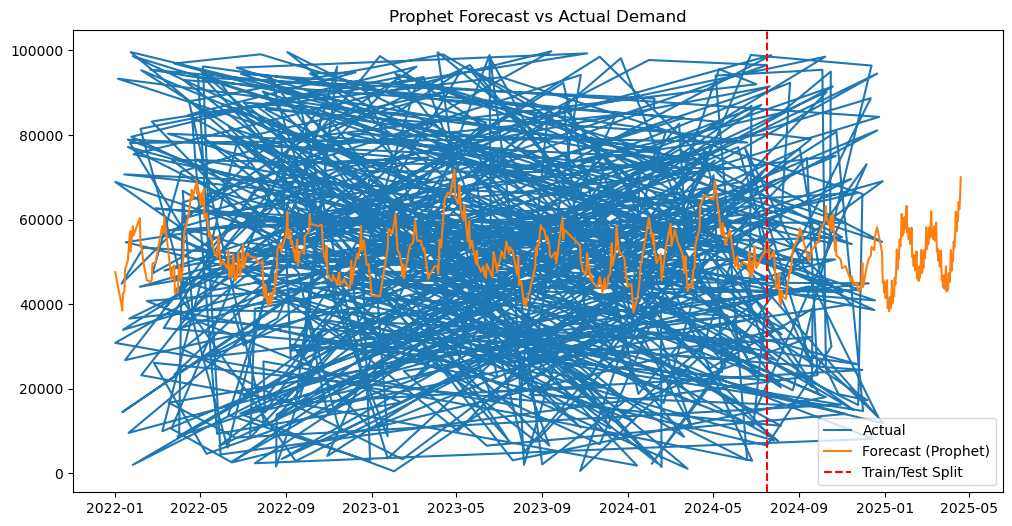

In [26]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast (Prophet)')
plt.axvline(test['ds'].iloc[0], color='red', linestyle='--', label='Train/Test Split')
plt.legend()
plt.title("Prophet Forecast vs Actual Demand")
plt.show()

In [30]:
print("XGBoost MAE:", 33040.35481400923)
print("Prophet MAE:", Prophet_MAE)

XGBoost MAE: 33040.35481400923
Prophet MAE: 21131.49452026219


In [15]:
import pandas as pd

df_result = pd.DataFrame([{
    'Model': 'Prophet',   
    'MAE': prophet_mae,   
    'RMSE': prophet_rmse, 
    'R2': prophet_r2      
}])

df_result.to_csv('prophet_result.csv', index=False)